C:\Users\김민재\AppData\Local\Temp\ipykernel_84212\4183332431.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


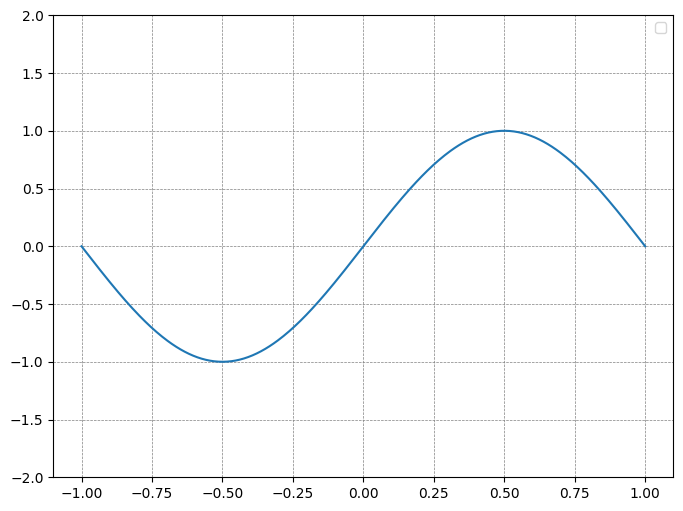

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def f(x):
    return np.sin(np.pi * x)

# Define the range
x = np.linspace(-1, 1, 400)
y = f(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.ylim(-2, 2)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


In [45]:
def E_out(f, h, x):
    return np.mean((f(x) - h(x))**2)

In [46]:
h0 = lambda x: 0
h1 = lambda x: 0.9 * x

f_x = f(x)

C:\Users\김민재\AppData\Local\Temp\ipykernel_84212\4145162363.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
C:\Users\김민재\AppData\Local\Temp\ipykernel_84212\4145162363.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


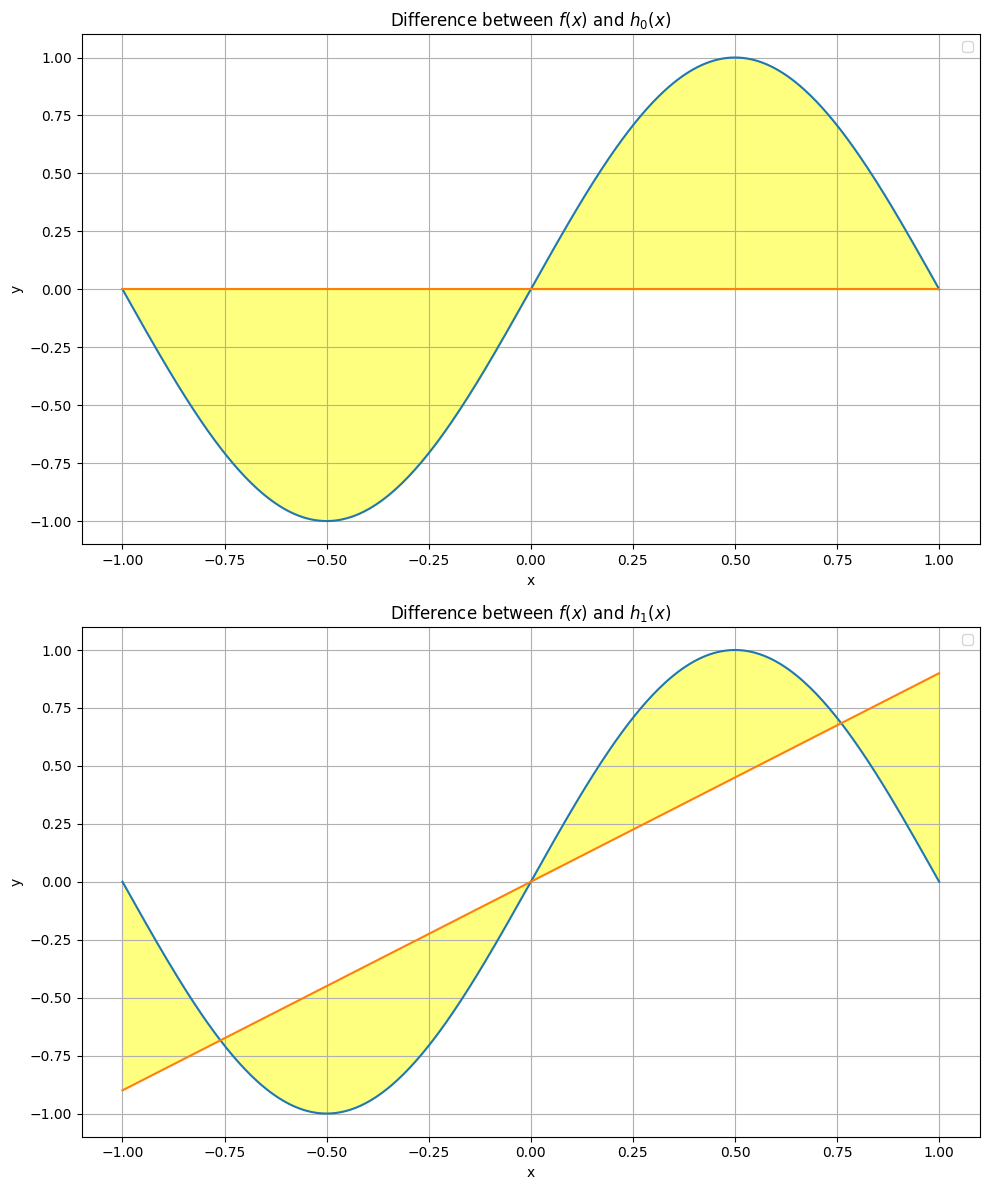

E_out for h0: 0.49875
E_out for h1: 0.1985897933631609


In [47]:
h0_x = np.zeros_like(x)  # h0(x) = 0 for all x
h1_x = h1(x)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Plot for h0
axs[0].plot(x, f_x)
axs[0].plot(x, h0_x)
axs[0].fill_between(x, f_x, h0_x, where=(f_x > h0_x), interpolate=True, color='yellow', alpha=0.5)
axs[0].fill_between(x, f_x, h0_x, where=(f_x < h0_x), interpolate=True, color='yellow', alpha=0.5)
axs[0].set_title('Difference between $f(x)$ and $h_0(x)$')
axs[0].legend()
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].grid(True)

# Plot for h1
axs[1].plot(x, f_x)
axs[1].plot(x, h1_x)
axs[1].fill_between(x, f_x, h1_x, where=(f_x > h1_x), interpolate=True, color='yellow', alpha=0.5)
axs[1].fill_between(x, f_x, h1_x, where=(f_x < h1_x), interpolate=True, color='yellow', alpha=0.5)
axs[1].set_title('Difference between $f(x)$ and $h_1(x)$')
axs[1].legend()
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].grid(True)

plt.tight_layout()
plt.show()

print('E_out for h0:', E_out(f, h0, x))
print('E_out for h1:', E_out(f, h1, x))

$\to$ $\mathcal{H}_1$ is better!

### We dont know target function

In [50]:
from tqdm import tqdm

100%|██████████| 1000/1000 [00:00<00:00, 47620.88it/s]

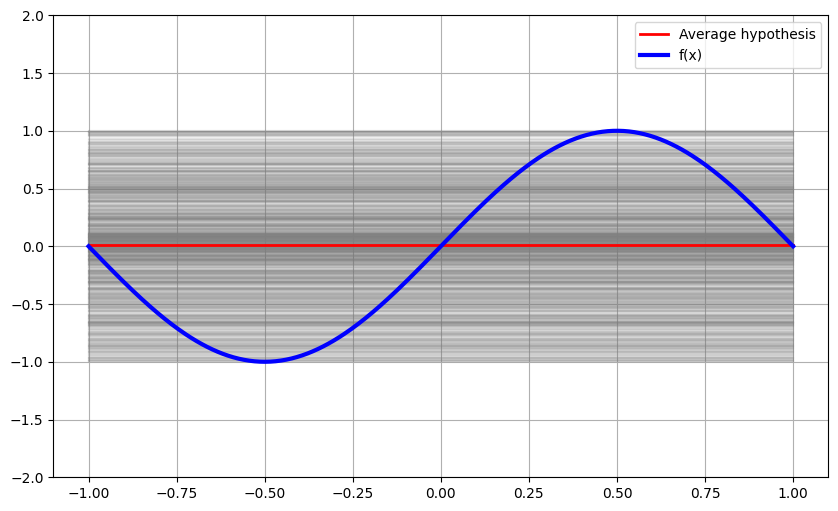

In [60]:
x = np.linspace(-1, 1, 400)

iterations = 1000

h0_hypotheses = []

for _ in tqdm(range(iterations)):
    points = np.random.uniform(-1, 1, 2)
    h0 = np.mean(f(points))
    h0_hypotheses.append(np.full_like(x, h0))

h0_avg_hypothesis = np.mean(h0_hypotheses, axis=0)


plt.figure(figsize=(10, 6))
for h in h0_hypotheses:
    plt.ylim(-2, 2)
    plt.plot(x, h, color='gray', alpha=0.1)

plt.plot(x, h0_avg_hypothesis, color='red', label='Average hypothesis', linewidth=2)
plt.plot(x, f(x), label='f(x)', color='blue', linewidth=3)
plt.legend()
plt.grid(True)
plt.show()

In [64]:
h0_bias = np.mean((f_x - h0_avg_hypothesis)**2)

h0_variance = np.mean((h0_hypotheses - h0_avg_hypothesis)**2)

print("H0 Bias:", h0_bias)
print("H0 Variance:", h0_variance)

H0 Bias: 0.4987976740364381
H0 Variance: 0.25093086460128927


100%|██████████| 1000/1000 [00:00<00:00, 13699.89it/s]


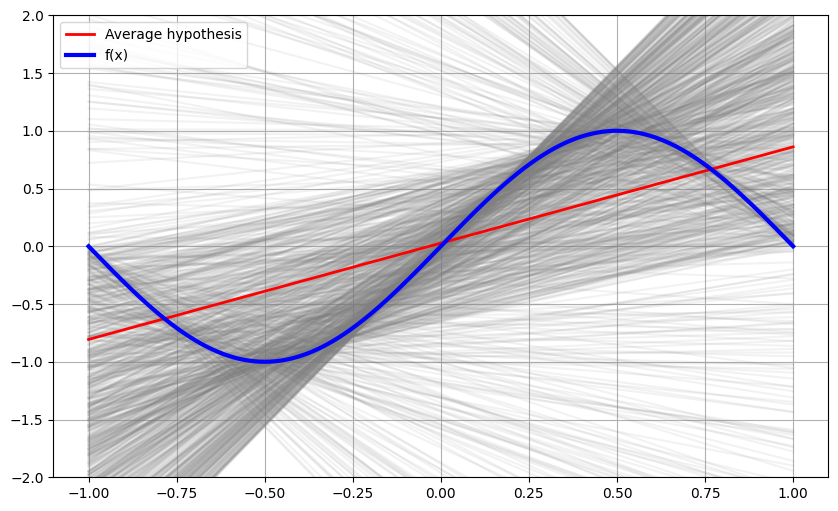

In [62]:
x = np.linspace(-1, 1, 400)

iterations = 1000

h1_hypotheses = []

for _ in tqdm(range(iterations)):
    points = np.random.uniform(-1, 1, 2)
    h1 = np.poly1d(np.polyfit(points, f(points), 1))
    h1_hypotheses.append(h1(x))

h1_avg_hypothesis = np.mean(h1_hypotheses, axis=0)

plt.figure(figsize=(10, 6))
for h in h1_hypotheses:
    plt.ylim(-2, 2)
    plt.plot(x, h, color='gray', alpha=0.1)

plt.plot(x, h1_avg_hypothesis, color='red', label='Average hypothesis', linewidth=2)
plt.plot(x, f(x), label='f(x)', color='blue', linewidth=3)
plt.legend()
plt.grid(True)
plt.show()


In [67]:
h1_bias = np.mean((f_x - h1_avg_hypothesis)**2)

h1_variance = np.mean((h1_hypotheses - h1_avg_hypothesis)**2)

print("H1 Bias:", h1_bias)
print("H1 Variance:", h1_variance)

H1 Bias: 0.20293935231505178
H1 Variance: 1.5596669693450174


In [66]:
print("h0 bias + h0 variance: ", h0_bias + h0_variance)
print("h1 bias + h1 variance: ", h1_bias + h1_variance)




h0 bias + h0 variance:  0.7497285386377274
h1 bias + h1 variance:  1.7626063216600691


## $\mathcal{H}_0$ is better!